In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = load_wine()

X = data.data
y = data.target

In [3]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
def calculate_accuracies(X, y, k_range, n_splits=10, random_state=42):
    """
    Функция, которая для каждого из методов кросс-валидации запускает алгоритм ближайших соседей с параметрами количества соседей от k_range[0] до k_range[1]

    Методы кросс-валидации:
    - KFold
    - LOO
    - Stratified KFold
    """
    result = pd.DataFrame()


    accuracies = []
    max_accuracies = []
    max_accuracy_k_numbers = []
    cvs = [KFold(n_splits=n_splits, shuffle=True, random_state=random_state),
           LeaveOneOut(),
           StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)]

    for cv in cvs:
        mean_accuracies = []

        for k in range(k_range[0], k_range[1]):
            clf = KNeighborsClassifier(n_neighbors=k)
            accuracies_for_k = cross_val_score(clf, X, y, cv=cv)
            mean_accuracies.append(accuracies_for_k.mean())

        max_accuracies.append(np.max(mean_accuracies))
        max_accuracy_k_numbers.append(np.argmax(mean_accuracies) + 1)
        accuracies.append(mean_accuracies)

    result['cv'] = cvs
    result['k'] = max_accuracy_k_numbers
    result['max_accuracy'] = max_accuracies
    result['accuracies'] = accuracies


    return result

In [20]:
def show_accuracy_plot(result, k_range=(1, 51)):
    """
    Функция для отрисовки графиков для функции calculate_accuracies
    """
    for i in range(3):
        plt.plot(range(k_range[0], k_range[1]), result['accuracies'][i])
    plt.legend(['KFold','LeaveOneOut','StratifiedKFold'])
    for i in range(3):
        plt.scatter(result['k'][i], result['max_accuracy'][i])
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.show()

In [7]:
# k от 1 до 51
res = calculate_accuracies(X, y, k_range=(1, 51), n_splits=10)
res

,cv,k,max_accuracy,accuracies
0,"KFold(n_splits=10, random_state=42, shuffle=True)",1,0.731046,"[0.7310457516339869, 0.6522875816993465, 0.703..."
1,LeaveOneOut(),1,0.769663,"[0.7696629213483146, 0.6741573033707865, 0.724..."
2,"StratifiedKFold(n_splits=10, random_state=42, ...",1,0.730065,"[0.7300653594771241, 0.6290849673202614, 0.685..."


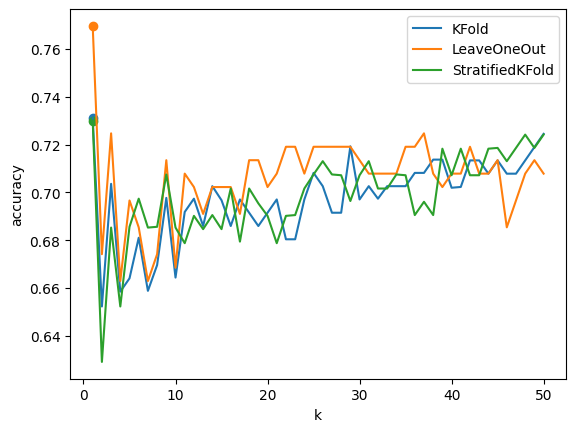

In [8]:
show_accuracy_plot(res)

Видно, что LeaveOneOut наиболее точный. Для всех трех методов наилучшее k = 1

In [9]:
# k от 1 до 51 и произведено масштабирование X
res = calculate_accuracies(scale(X), y, k_range=(1, 51), n_splits=10)
res

,cv,k,max_accuracy,accuracies
0,"KFold(n_splits=10, random_state=42, shuffle=True)",11,0.977778,"[0.9437908496732026, 0.9326797385620915, 0.949..."
1,LeaveOneOut(),36,0.983146,"[0.9550561797752809, 0.9438202247191011, 0.955..."
2,"StratifiedKFold(n_splits=10, random_state=42, ...",34,0.983333,"[0.9552287581699346, 0.9441176470588235, 0.955..."


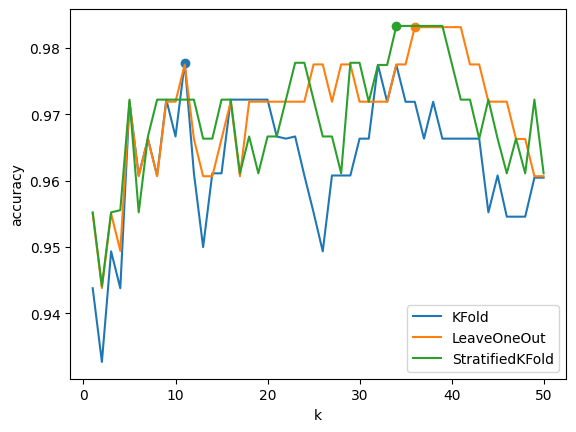

In [10]:
show_accuracy_plot(res)

После масштабирования точность сильно возросла для всех методов, а также изменилось k

In [11]:
# k от 1 до 51 и произведено масштабирование X другим способом
scaler = StandardScaler()
res = calculate_accuracies(scaler.fit_transform(X), y, k_range=(1, 51), n_splits=10)
res

,cv,k,max_accuracy,accuracies
0,"KFold(n_splits=10, random_state=42, shuffle=True)",11,0.977778,"[0.9437908496732026, 0.9326797385620915, 0.949..."
1,LeaveOneOut(),36,0.983146,"[0.9550561797752809, 0.9438202247191011, 0.955..."
2,"StratifiedKFold(n_splits=10, random_state=42, ...",34,0.983333,"[0.9552287581699346, 0.9441176470588235, 0.955..."


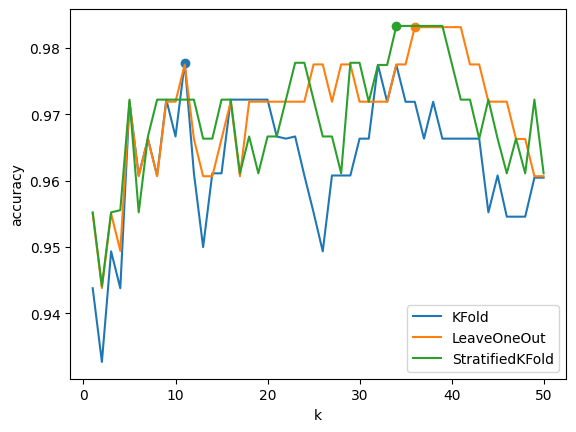

In [12]:
show_accuracy_plot(res)

Результаты такие же, как и в предыдущем способе масштабирования.

In [17]:
# просто для интереса, что будет если k будет меняться в больших пределах
res = calculate_accuracies(scale(X), y, k_range=(1, 150), n_splits=10)
res

,cv,k,max_accuracy,accuracies
0,"KFold(n_splits=10, random_state=42, shuffle=True)",11,0.977778,"[0.9437908496732026, 0.9326797385620915, 0.949..."
1,LeaveOneOut(),36,0.983146,"[0.9550561797752809, 0.9438202247191011, 0.955..."
2,"StratifiedKFold(n_splits=10, random_state=42, ...",34,0.983333,"[0.9552287581699346, 0.9441176470588235, 0.955..."


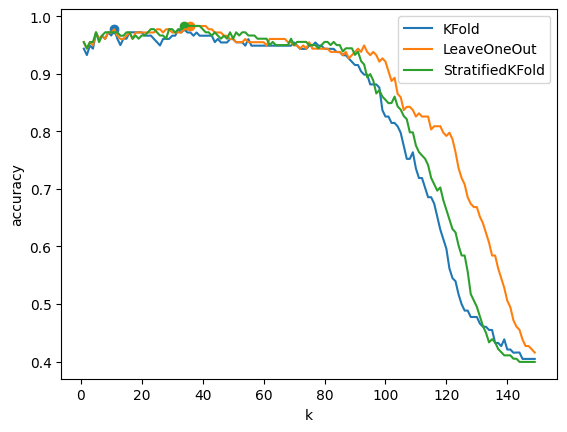

In [21]:
show_accuracy_plot(res, k_range=(1, 150))